<a href="https://colab.research.google.com/github/Faizack/Clone/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
#reading the data-pandas dataframe
df=pd.read_csv("/content/Diabetes Dataset.csv")
df.head() #first 5 records of file for sample

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
4,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N


In [43]:
print("Shape",df.shape) #Shape- no of rows and columns


Shape (1000, 14)


In [44]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [45]:
details(df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
ID,0,0.0,int64,800
No_Pation,0,0.0,int64,961
Gender,0,0.0,object,2
AGE,0,0.0,int64,50
Urea,0,0.0,float64,110
Cr,0,0.0,int64,113
HbA1c,0,0.0,float64,111
Chol,0,0.0,float64,77
TG,0,0.0,float64,69
HDL,0,0.0,float64,48


**Observation :** As We can see there is no missing Value

## **EDA**

Y    844
N    103
P     53
Name: CLASS, dtype: int64


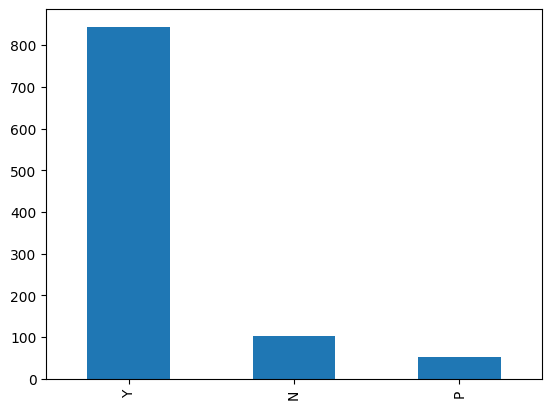

In [46]:
# View label distribution
print(df['CLASS'].value_counts())
# Using bar charts
plot = df['CLASS'].value_counts().plot(kind="bar")
plt.show()

**Observation :** In this dataset we have more person which has Diabetes.

In [47]:
# Dropping rows where Diabetes == 'P' as  we doing binary we are droping p class
df1 = df[df['CLASS'] != 'P'].reset_index(drop=True)
print("Before Dropping Shape",df.shape) #Shape- no of rows and columns
print("After Dropping Shape",df1.shape) #Shape- no of rows and columns

Before Dropping Shape (1000, 14)
After Dropping Shape (947, 14)


## **Descriptive statistics for the numerical variables**

In [48]:
print(df1[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']].describe())

              AGE        Urea          Cr       HbA1c        Chol          TG  \
count  947.000000  947.000000  947.000000  947.000000  947.000000  947.000000   
mean    54.101373    5.159074   69.103485    8.408617    4.878691    2.362101   
std      8.499612    2.975024   60.862961    2.544040    1.313356    1.417275   
min     20.000000    0.500000    6.000000    0.900000    0.000000    0.300000   
25%     51.000000    3.700000   48.000000    6.800000    4.000000    1.500000   
50%     55.000000    4.600000   60.000000    8.100000    4.800000    2.000000   
75%     59.000000    5.700000   73.000000   10.200000    5.600000    2.900000   
max     79.000000   38.900000  800.000000   16.000000   10.300000   13.800000   

              HDL         LDL        VLDL         BMI  
count  947.000000  947.000000  947.000000  947.000000  
mean     1.209081    2.616304    1.903485   29.893897  
std      0.672423    1.127316    3.757012    4.869852  
min      0.200000    0.300000    0.100000   19

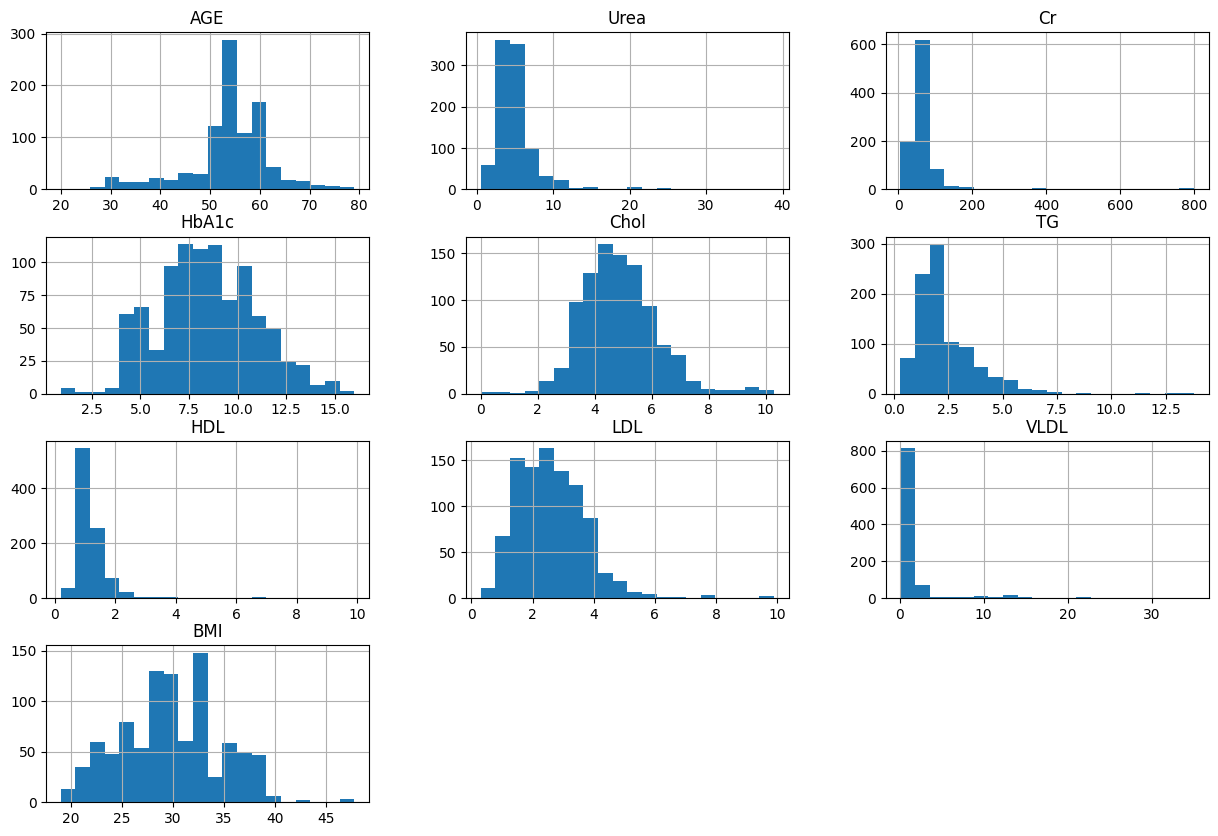

In [49]:
# Histograms for the numerical variables
df1.hist(column=['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'], bins=20, figsize=(15,10))
plt.show()

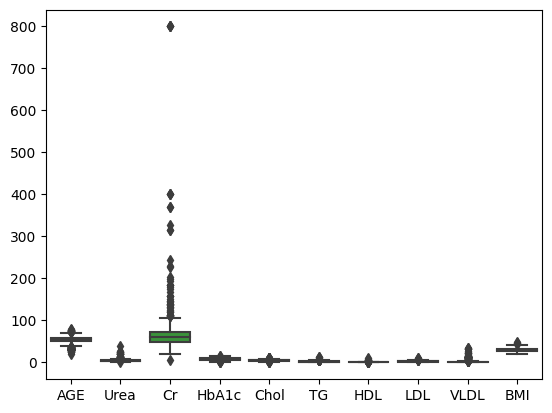

In [50]:
# Boxplots for the numerical variables
sns.boxplot(data=df1[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']])
plt.show()

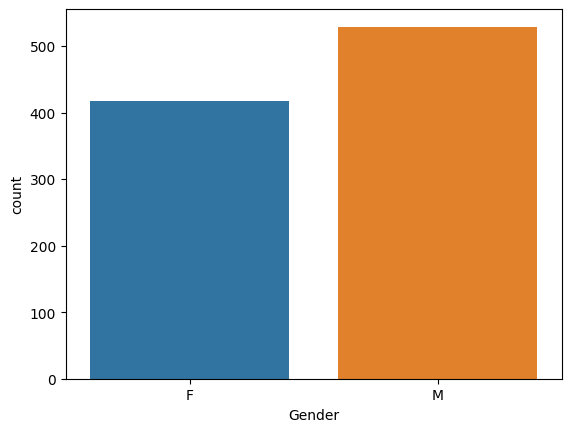

In [51]:
# Countplot for the categorical variable Gender
sns.countplot(x='Gender', data=df1)
plt.show()

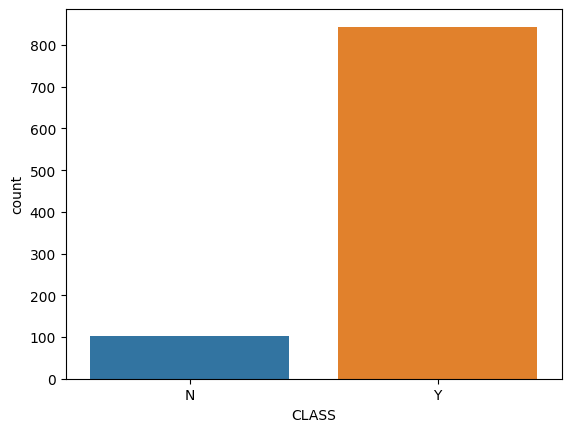

In [52]:
# Countplot for the categorical variable Diabetes
sns.countplot(x='CLASS', data=df1)
plt.show()

In [54]:
# Droping Unwanted Column
df1 = df1.drop(['ID','No_Pation'], axis=1)
df1.head(1)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N


In [57]:
def label_encode(df):
    """
    Performs label encoding for all object and category type columns in a dataframe,
    including the target column. Returns the encoded dataframe.
    """
    # Create a copy of the dataframe
    encoded_df = df.copy()
    
    # Create a LabelEncoder object
    le = LabelEncoder()
    
    # Encode object and category type columns
    for col in encoded_df.select_dtypes(include=['object', 'category']):
        encoded_df[col] = le.fit_transform(encoded_df[col])
    
    # Encode the target variable
    encoded_df['CLASS'] = le.fit_transform(encoded_df['CLASS'])
    
    return encoded_df

In [58]:
df1 = label_encode(df1)

In [67]:
df1.dtypes

Gender      int64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS       int64
dtype: object

In [59]:
df1.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

## EDA

<Axes: >

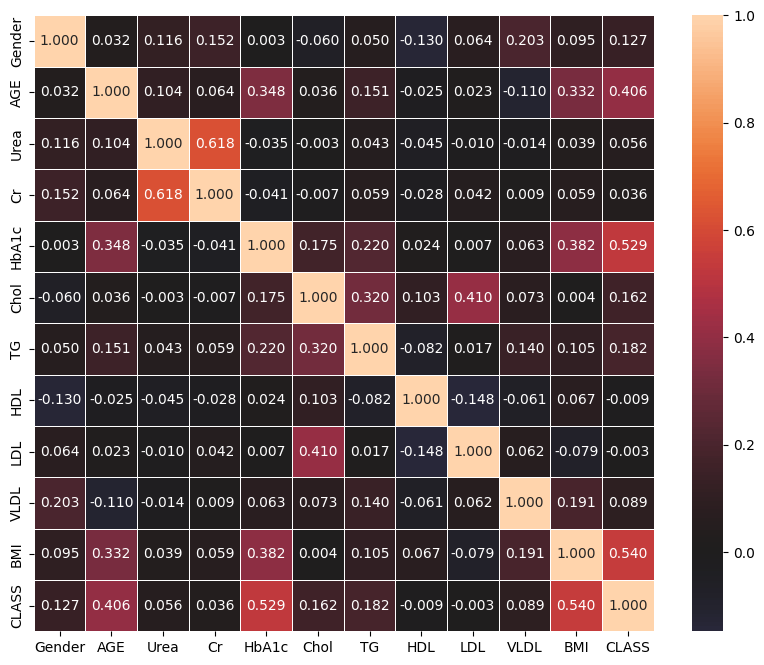

In [60]:
# correlation matrix/ graph
#checking the correlation between few columns of interest
# corr_data= bankdata[['age','balance','day','duration','campaign','pdays','previous','y']]
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, fmt='0.3f', center=0,linewidths=.5)

### Splitting Dataset into train and test with 70 and 30 ratio

In [68]:
# Split the dataset into training and test datasets
X = df1.drop(['CLASS'], axis=1)
y = df1['CLASS']

In [69]:
x_train, x_test, Y_train, Y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [77]:
def evaluate_models(X_train, y_train, X_test, y_test):
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(), 
    }

    # Fit the models, make predictions, and calculate evaluation metrics
    results = {}
    for name, model in models.items():
        # Fit the model using cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Model: {name}")
        print(f"Cross-validation scores: {scores}")
        print(f"Mean cross-validation score: {scores.mean()}")
        print(f"Standard deviation of cross-validation scores: {scores.std()}")

        # Fit the model on the entire training set and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_roc = roc_auc_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc_roc': auc_roc,
            'confusion': confusion,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        }
        
        # Print the evaluation metrics
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"AUC-ROC: {auc_roc}")
        
        print(f"Confusion Matrix:\n")

      
        # Create the heatmap
        sns.heatmap(confusion, annot=True,fmt='d', cmap="Blues")

        # Add labels and title
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.title("Confusion Matrix")

        # Show the plot
        plt.show()

        print("")
        print("")

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    return results

Model: Logistic Regression
Cross-validation scores: [0.90977444 0.90977444 0.9469697  0.90909091 0.91666667]
Mean cross-validation score: 0.9184552289815449
Standard deviation of cross-validation scores: 0.014523612892525557
Accuracy: 0.8947368421052632
Precision: 0.7240740740740741
Recall: 0.615252730505461
F1 Score: 0.6452870892797875
AUC-ROC: 0.615252730505461
Confusion Matrix:



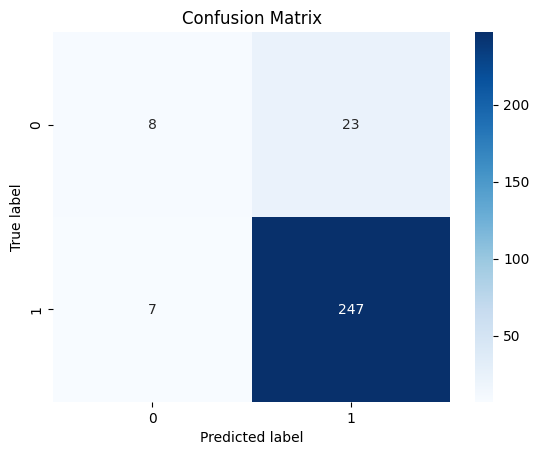

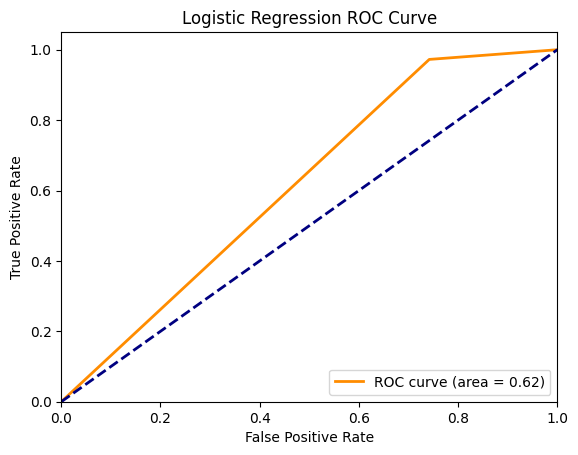

{'Logistic Regression': {'accuracy': 0.8947368421052632, 'precision': 0.7240740740740741, 'recall': 0.615252730505461, 'f1': 0.6452870892797875, 'auc_roc': 0.615252730505461, 'confusion': array([[  8,  23],
       [  7, 247]]), 'fpr': array([0.        , 0.74193548, 1.        ]), 'tpr': array([0.        , 0.97244094, 1.        ]), 'roc_auc': 0.615252730505461}}


In [78]:
results = evaluate_models(x_train, Y_train, x_test, Y_test)

print(results)